# Neural Networks: Theory and Implementation

Group Members:

Name: `Sayeh Jarollahi` \
Student ID (matriculation number): `XXX` \
Email: `sajaXXXX@stud.uni-saarland.de` 

Name: `Mahsa Amani` \
Student ID (matriculation number): `7064006` \
Email: `maam00002@stud.uni-saarland.de`

## Exercise 1

In [7]:
import numpy as np

def random_data_generator(n=100):
    # Generating two clusters of 100 random points 
    cluster1 = np.random.randn(n, 2)  # Cluster 1
    cluster2 = np.random.randn(n, 2)  # Cluster 2

    # Shifting the mean of each cluster
    cluster1 += np.array([-2, -2])
    cluster2 += np.array([2, 2])

    # Assigning classes
    class1 = -np.ones((n, 1))  # Class -1 for cluster 1
    class2 = np.ones((n, 1))   # Class 1 for cluster 2 

    # Combining clusters and classes
    X = np.vstack((cluster1, cluster2))
    y = np.vstack((class1, class2))

    # Shuffling the clusters and classes
    indices = np.random.permutation(2 * n)
    X = X[indices]
    y = y[indices]

    return X, y

In [31]:
def xor_data_generator():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    # computing each point class as (x XOR y)
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)
    # replacing 0 label with -1 label
    y = np.where(y == 0, -1, y)
    # reshaping for having a vertical array
    y = y.reshape(-1, 1)

    return X, y

In [26]:
import matplotlib.pyplot as plt

def cluster_visualization(X, y, title=""):
    # Separating points based on their classes
    X1 = X[y[:, 0] == 1] # for class == 1
    X2 = X[y[:, 0] == -1] # for class == -1

    # plot
    plt.plot(X1[:, 0], X1[:, 1], 'ro', label="Class 1")  # red for class 1
    plt.plot(X2[:, 0], X2[:, 1], 'bo', label="Class -1")  # blue for class -1
    plt.title(f'Cluster Visualization of {title} dataset')
    plt.legend()
    plt.show()

In [25]:
np.random.seed(42)

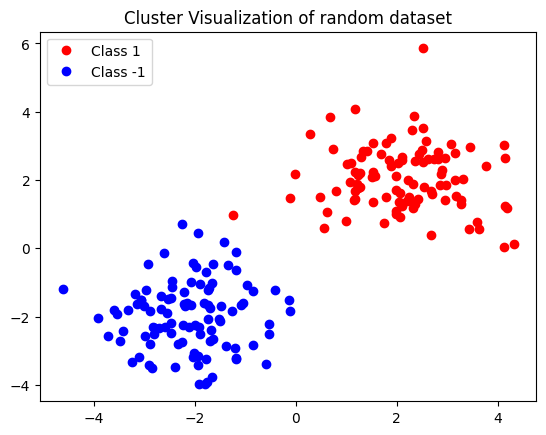

In [27]:
X, y = random_data_generator()
cluster_visualization(X, y, title="random")

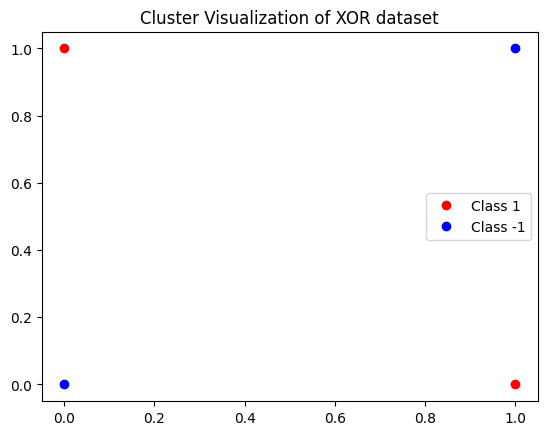

In [33]:
X, y = xor_data_generator()
cluster_visualization(X, y, title="XOR")

## Exercise 2

## Exercise 3